In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
pd.set_option('display.max_columns',None)

In [96]:
df = pd.read_csv('final_df.csv')

In [169]:
df.head(10)

,Date,fight_name,fighter1_name,fighter2_name,kd_1,kd_2,sig_str_pct_1,sig_str_pct_2,td_pct_1,td_pct_2,sub_att_1,sub_att_2,pass_1,pass_2,sig_str_1_landed,sig_str_1_attempted,sig_str_2_landed,sig_str_2_attempted,total_str_1_landed,total_str_1_attempted,total_str_2_landed,total_str_2_attempted,td_1_landed,td_1_attempted,td_2_landed,td_2_attempted,head_1_landed,head_1_attempted,head_2_landed,head_2_attempted,body_1_landed,body_1_attempted,body_2_landed,body_2_attempted,leg_1_landed,leg_1_attempted,leg_2_landed,leg_2_attempted,distance_1_landed,distance_1_attempted,distance_2_landed,distance_2_attempted,clinch_1_landed,clinch_1_attempted,clinch_2_landed,clinch_2_attempted,ground_1_landed,ground_1_attempted,ground_2_landed,ground_2_attempted,City,State,Country,fighter1_outcome,fighter2_outcome,weight_bout,method,num_rounds,details,time,referee,fighter1_last_fight,fighter1_since_win,fighter1_since_lose,fighter2_last_fight,fighter2_since_win,fighter2_since_lose,nick_name_1,height_1,weight_1,reach_1,stance_1,date_birth_1,SLpm_1,StrAcc_1,SApm_1,StrDef_1,TDavg_1,TDacc_1,TDdef_1,SubAvg_1,Win_1,Lose_1,Draw_1,nick_name_2,height_2,weight_2,reach_2,stance_2,date_birth_2,SLpm_2,StrAcc_2,SApm_2,StrDef_2,TDavg_2,TDacc_2,TDdef_2,SubAvg_2,Win_2,Lose_2,Draw_2,age_1,age_2
0,1993-11-12,UFC 1: The Beginning,Royce Gracie,Ken Shamrock,0,0,0.00,0.00,0.00,0.0,1,0,2,0,0,0,0,0,12,12,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Denver,Colorado,USA,1,0,Open Weight Bout,Submission,1,Rear Naked Choke,57,Joao Alberto Barreto,0.0,0,0,0.0,0,0,NaN,73.0,175.0,NaN,Southpaw,1966-12-12,0.88,41.0,1.13,37.0,0.00,0.0,66.0,0.8,15,2,3,The World's Most Dangerous Man,73.0,205.0,72.0,Orthodox,1964-02-11,1.47,46.0,4.3,39.0,0.94,60.0,44.0,2.5,28,17,2,27.0,29.0
1,1993-11-12,UFC 1: The Beginning,Royce Gracie,Gerard Gordeau,0,0,0.50,0.00,0.33,0.0,1,0,2,0,1,2,0,0,3,4,0,0,1,3,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,Denver,Colorado,USA,1,0,NaN,Submission,1,Rear Naked Choke,104,Joao Alberto Barreto,0.0,0,0,0.0,0,0,NaN,73.0,175.0,NaN,Southpaw,1966-12-12,0.88,41.0,1.13,37.0,0.00,0.0,66.0,0.8,15,2,3,NaN,77.0,216.0,NaN,Orthodox,1959-03-30,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,2,2,0,27.0,34.0
2,1993-11-12,UFC 1: The Beginning,Royce Gracie,Art Jimmerson,0,0,0.00,0.00,1.00,0.0,0,0,2,0,0,3,0,0,4,7,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,Denver,Colorado,USA,1,0,Open Weight Bout,Submission,1,Other \n Position - Mount,138,Joao Alberto Barreto,0.0,0,0,0.0,0,0,NaN,73.0,175.0,NaN,Southpaw,1966-12-12,0.88,41.0,1.13,37.0,0.00,0.0,66.0,0.8,15,2,3,NaN,73.0,196.0,NaN,Orthodox,1963-08-04,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,1,0,27.0,30.0
3,1993-11-12,UFC 1: The Beginning,Kevin Rosier,Zane Frazier,2,0,0.55,0.42,0.00,0.0,0,0,0,0,15,27,12,28,38,53,13,29,0,0,0,0,12,23,7,19,3,4,3,6,0,0,2,3,4,10,0,7,4,9,10,19,7,8,2,2,Denver,Colorado,USA,1,0,Open Weight Bout,KO/TKO,1,to \n Corner Stoppage,260,Joao Alberto Barreto,0.0,0,0,0.0,0,0,NaN,76.0,275.0,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,2,6,0,Nasty,77.0,250.0,NaN,Orthodox,NaN,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,4,11,0,NaN,NaN
4,1993-11-12,UFC 1: The Beginning,Ken Shamrock,Patrick Smith,0,0,1.00,0.50,0.50,0.0,2,0,0,0,1,1,4,8,4,4,16,20,1,2,0,0,1,1,1,4,0,0,1,1,0,0,2,3,0,0,1,1,0,0,1,1,1,1,2,6,Denver,Colorado,USA,1,0,Open Weight Bout,Submission,1,Heel Hook From Guard,109,Joao Alberto Barreto,0.0,0,0,0.0,0,0,The World's Most Dangerous Man,73.0,205.0,72.0,Orthodox,1964-02-11,1.47,46.0,4.30,39.0,0.94,60.0,44.0,2.5,28,17,2,NaN,74.0,225.0,NaN,Orthodox,1963-08-28,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,20,17,0,29.0,30.0
5,1993-11-12,UFC 1: The Beginning,Gerard Gordeau,Kevin Rosier,1,0,0.64,0.00,0.00,0.0,0,0,0,0,11,17,0,3,11,17,0,3,0,0,0,0,7,13,0,1,1,1,0,1,3,3,0,1,5,8,0,3,0,0,0,0,6,9,0,0,Denver,Colorado,USA,1,0,Open Weight Bout,KO/TKO,1,to \n Corner Stoppage,59,Joao Alberto Barreto,0.0,0,0,0.0,0,0,NaN,77.0,216.0,NaN,Orthodox,1959-03-30,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,2,2,0,NaN,76.0,275.0,NaN,Orthodox,NaN,0.00,0.0,0.0,0.0,0.00,0.0,

In [97]:
df.sort_values('Date',inplace = True)

In [98]:
df.reset_index(drop=True,inplace = True)

## EXPLORING THE DATA

In [6]:
# all fighters in the dataset
all_fighters = np.unique(np.concatenate((df['fighter2_name'].unique(),df['fighter1_name'])))

print("There are {} fighters in the dataset".format(len(all_fighters)))

There are 2061 fighters in the dataset


In [7]:
unique_matches = df['fight_name'].unique()
print("There are {} total events in the dataset".format(len(unique_matches)))

There are 533 total events in the dataset


In [8]:
#remove all trailing & leading spaces from columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
print("UFC events were hosted in {} different countries".format(len(df['Country'].unique())))
print("{:0.2f}% of UFC events occured in the USA".format(df['Country'].value_counts(normalize = True)[0] * 100 ))
USA = df[df['Country']== 'USA']
print("{:0.2f}% of UFC events in the USA, was hosted in Las Vegas,Nevada".format(USA['City'].value_counts(normalize=True)[0]*100))

UFC events were hosted in 26 different countries
65.69% of UFC events occured in the USA
37.01% of UFC events in the USA, was hosted in Las Vegas,Nevada


In [10]:
def mean_hist(col1,col2,title,xlabel,df=df): 
    print('Average {}: {}'.format(col1,np.mean(df[col1])))
    print('Average {}: {}'.format(col2,np.mean(df[col2])))
    sns.distplot(df[col1],kde = False,
                 hist_kws={"histtype": "step", "linewidth": 3,
                                "alpha": .5, "color": "b"})
    sns.distplot(df[col2],kde = False,
                hist_kws={"histtype": "step", "linewidth": 3,
                                "alpha": .5, "color": "r"})
    sns.despine(top=True,bottom=False,right=True)
    plt.title(title)
    plt.xlabel(xlabel)

Average kd_1: 0.24991310392770247
Average kd_2: 0.18143899895724713


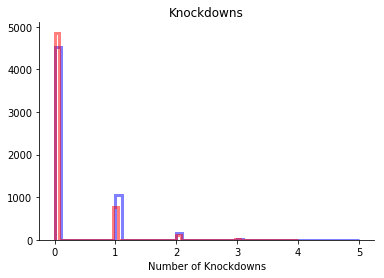

In [11]:
mean_hist('kd_1','kd_2','Knockdowns','Number of Knockdowns')

Average sig_str_pct_1: 0.4693361140076454
Average sig_str_pct_2: 0.416482446993396


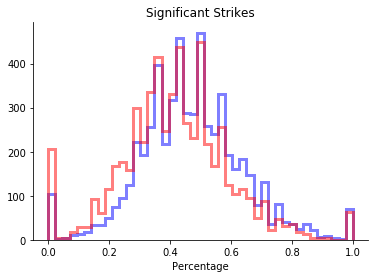

In [12]:
mean_hist("sig_str_pct_1", "sig_str_pct_2",'Significant Strikes','Percentage')

Average td_pct_1: 0.3201112269725409
Average td_pct_2: 0.22823427181091457


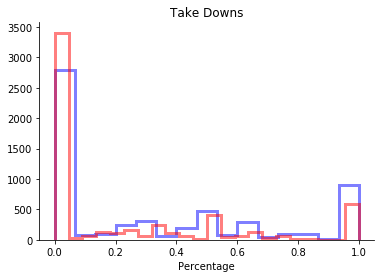

In [13]:
mean_hist("td_pct_1", "td_pct_2",'Take Downs','Percentage')

Average age_1: 30.051616266944734
Average age_2: 29.765206812652067


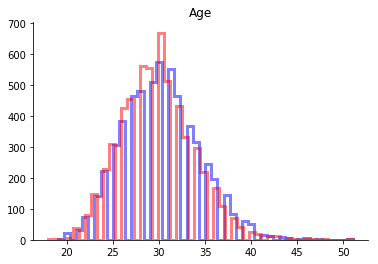

In [28]:
mean_hist("age_1", "age_2",'Age','',df=df[['age_1','age_2']].fillna(30))

In [37]:
df['weight_bout'].unique()

array(['Open Weight Bout', nan, 'Heavyweight Bout', 'Lightweight Bout',
       'Middleweight Bout', 'Welterweight Bout', 'Super Heavyweight Bout',
       'Light Heavyweight Bout', 'Catch Weight Bout',
       'Featherweight Bout', 'Bantamweight Bout', 'Flyweight Bout',
       "Women's Bantamweight Bout", "Women's Strawweight Bout",
       "Women's Flyweight Bout", "Women's Featherweight Bout"],
      dtype=object)

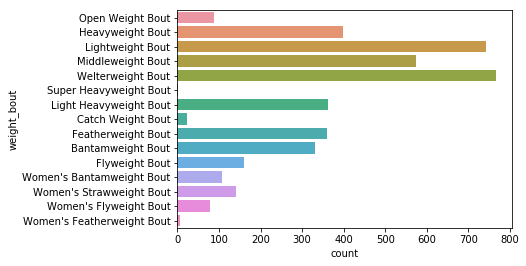

In [45]:
sns.countplot(y='weight_bout',data=df);

In [50]:
df['referee'].value_counts().head(10)

Herb Dean           818
John McCarthy       637
Dan Miragliotta     394
Mario Yamasaki      391
Marc Goddard        325
Yves Lavigne        264
Steve Mazzagatti    198
Leon Roberts        192
Keith Peterson      171
Jason Herzog        138
Name: referee, dtype: int64

In [114]:
sig_str =df[['sig_str_pct_1','sig_str_pct_2']].mean(axis=1)
td_pct = df[["td_pct_1", "td_pct_2"]].mean(axis=1)
SLpm = df[['SLpm_1','SLpm_2']].mean(axis=1)
SApm = df[['SApm_1','SApm_2']].mean(axis=1)
sub_at = df[['sub_att_1','sub_att_2']].mean(axis=1)

In [115]:
records = df['Date'].to_frame()
records['sig_str'] = sig_str
records['td_pct'] = td_pct
records['SLpm'] = SLpm
records['SApm'] = SApm
records['sub_at'] = sub_at

In [117]:
records.set_index('Date',inplace = True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDB5401198>,
      dtype=object)

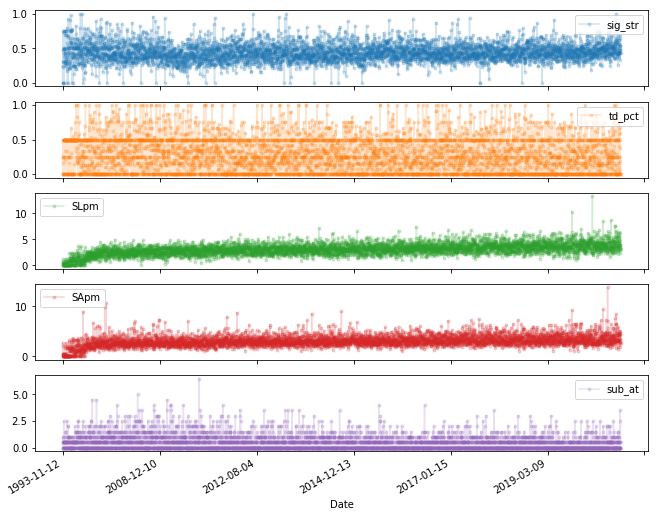

In [118]:
records.plot(marker='.', alpha=0.2, linestyle='-', figsize=(11, 9), subplots=True)

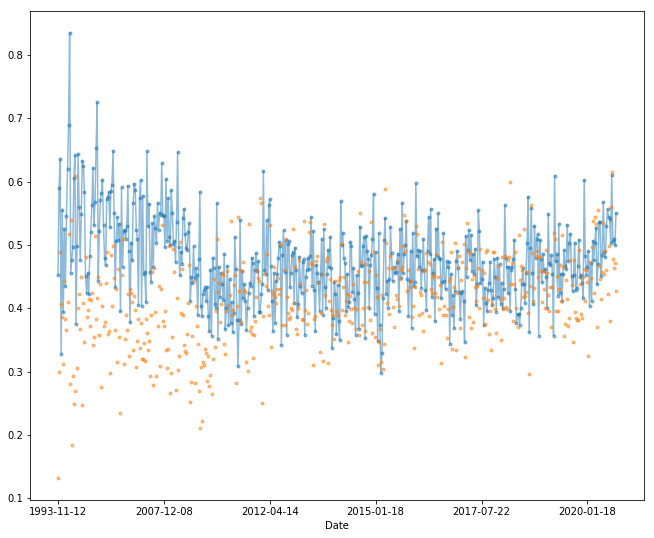

In [65]:
strikes =df.groupby('Date')[['sig_str_pct_1','sig_str_pct_2']].mean()
strikes['sig_str_pct_1'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
strikes['sig_str_pct_2'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))
#axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)


In [126]:
testing = df[['Date','sig_str_pct_1']].copy()
testing.loc[0,'sig_str_1'] = testing.loc[0,'sig_str_pct_1']

In [127]:
for i in range(1,len(testing)):
    testing.loc[i,'sig_str_1'] = testing.loc[i,'sig_str_pct_1'] + testing.loc[i-1,'sig_str_1']

,Date,sig_str_pct_1,sig_str_1
0,1993-11-12,0.00,0.0
1,1993-11-12,0.50,NaN
2,1993-11-12,0.00,NaN
3,1993-11-12,0.55,NaN
4,1993-11-12,1.00,NaN
...,...,...,...
5749,2020-09-19,0.57,NaN
5750,2020-09-19,0.28,NaN
5751,2020-09-19,0.49,NaN
5752,2020-09-19,0.69,NaN


In [131]:
(.57 +.28 +.49 + .69 +.88)/5

0.582

In [ ]:
CUMULATIVE SUM FOR EACH FIGHTER...

In [228]:
TOTAL_STRIKES =df.groupby(['fighter1_name'])['sig_str_1_attempted'].apply(lambda x: x.shift(1).cumsum())

In [201]:
df.groupby(['fighter1_name','Date'])['sig_str_1_attempted'].sum()

fighter1_name     Date      
Aalon Cruz        2020-02-29     12
Aaron Phillips    2014-08-23     54
Aaron Riley       2008-11-15    222
                  2009-08-08    122
                  2010-05-29    104
                               ... 
Zak Ottow         2018-12-15     71
Zelim Imadaev     2019-11-09     71
Zubaira Tukhugov  2014-10-04     67
                  2015-12-10     83
                  2019-09-07     58
Name: sig_str_1_attempted, Length: 5694, dtype: int64

In [229]:
asd.head(10)

0     NaN
1     0.0
2     2.0
3     NaN
4     NaN
5     NaN
6    17.0
7     NaN
8     5.0
9     9.0
Name: sig_str_1_attempted, dtype: float64

In [137]:
(.57 + .28 )/2

0.425

In [138]:
(.425 +.49)/3

0.305

In [143]:
(.305+.69)/4

0.24874999999999997

In [136]:
(.5735 + .88)/5

0.72675